### Import packages:

In [32]:
import numpy as np
import pandas as pd

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data = pd.read_csv("DATASETS\claims.csv")
cust_data = pd.read_csv("DATASETS\cust_demographics.csv")

#claims_data
#cust_data

In [3]:
#merge claims_data & cust_data

in_claim = pd.merge(left = cust_data, right = claims_data, how = 'outer', left_on = ['CUST_ID'], right_on = ['customer_id'])
in_claim.drop(columns = 'customer_id', inplace = True)
in_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [4]:
in_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

#### claim_date, claim_amount, DateOfBirth have mismatch with the current datatypes

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [9]:
#change datatype of 'claim_date' from 'object' to 'datetime64[ns]'
in_claim['claim_date'] = pd.to_datetime(in_claim['claim_date'])

#change datatype of 'DateOfBirth' from 'object' to 'datetime64[ns]'
in_claim['DateOfBirth'] = pd.to_datetime(in_claim['DateOfBirth'], format = '%d-%b-%y')

#correct year for column DateOfBirth with 'year > 2023'
in_claim.loc[(in_claim.DateOfBirth.dt.year > 2023), "DateOfBirth"].apply(lambda x: x - pd.DateOffset(years = 100))

#change datatype of 'claim_amount' from 'object' to 'float32' and removing the $ sign.
in_claim["claim_amount"] = pd.to_numeric(in_claim.claim_amount.replace("$",""))

in_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
in_claim['flag'] = in_claim.police_report.apply(lambda x : '1' if x == 'Yes' else ('0' if x == 'No' else np.nan))
in_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [11]:
in_claim = in_claim.groupby('CUST_ID').first().reset_index(drop = True)
in_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,None
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,517-562-4916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0
1081,Female,2066-06-19,HI,457-752-1374,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,1
1082,Female,2063-11-18,NC,643-246-4718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1083,Male,1995-06-08,OR,395-246-6172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [12]:
in_claim.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
police_report            7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   299
dtype: int64

In [13]:
cat_var = ['gender', 'State', 'Segment', 'incident_cause', 'claim_area', 'claim_type', 'fraudulent', 'flag']
con_var = ['claim_amount']

for i in cat_var:
    in_claim[i] = in_claim[i].fillna(in_claim[i].mode()[0])

for a in con_var:
    in_claim[a] = in_claim[a].fillna(in_claim[a].mean())
    
in_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,517-562-4916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0
1081,Female,2066-06-19,HI,457-752-1374,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1
1082,Female,2063-11-18,NC,643-246-4718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0
1083,Male,1995-06-08,OR,395-246-6172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0


### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18,  Youth 18-30, Adult 30-60, Senior > 60


In [14]:
in_claim['age'] = round((in_claim.claim_date - in_claim.DateOfBirth).apply(lambda x : x.days/365.25),0)

in_claim['age_group'] = in_claim.age.apply(lambda x : 'Children' if x < 18 else ('Youth' if (x >= 18 and x < 30) else ('Adult' if (x >= 30 and x < 60) else 'Senior' )))

in_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_group
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,40.0,Adult
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,45.0,Adult
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0,29.0,Youth
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1,47.0,Adult
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,517-562-4916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0,-47.0,Children
1081,Female,2066-06-19,HI,457-752-1374,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1,-48.0,Children
1082,Female,2063-11-18,NC,643-246-4718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0,-46.0,Children
1083,Male,1995-06-08,OR,395-246-6172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0,22.0,Youth


### 8. What is the average amount claimed by the customers from various segments?


In [15]:
avg_amount = round(in_claim.groupby('Segment').claim_amount.mean(), 0)
avg_amount

Segment
Gold        12756.0
Platinum    12370.0
Silver      12271.0
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [16]:
total_claim_amount = in_claim.loc[(in_claim.claim_date < '2018-09-11')].groupby('incident_cause').claim_amount.sum()
total_claim_amount

incident_cause
Crime                 7.244625e+05
Driver error          3.264286e+06
Natural causes        1.312706e+06
Other causes          3.725038e+06
Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [17]:
total_adult = in_claim.loc[(in_claim.State.isin(['TX', 'DE', 'AK'])) 
              & (in_claim.incident_cause.isin(['Driver error', 'Other driver error']))].groupby('State').total_policy_claims.count()
total_adult

State
AK    10
DE    15
TX    10
Name: total_policy_claims, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

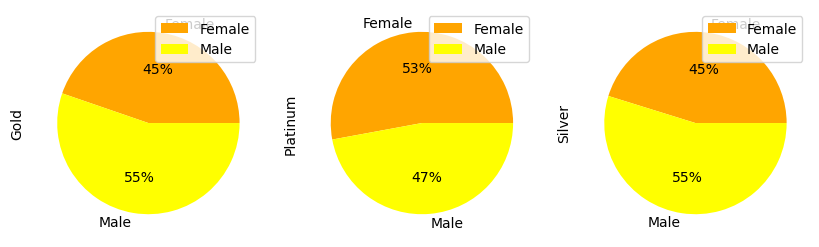

In [18]:
agg_claim_amount = in_claim.groupby(['gender', 'Segment']).claim_amount.sum().reset_index()

agg_claim_amount = agg_claim_amount.pivot(index = 'gender', columns = 'Segment', values = 'claim_amount')

agg_claim_amount.plot(kind = 'pie', subplots = True, figsize = (10,8), autopct='%.0f%%', colors = ['orange', 'yellow'])

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


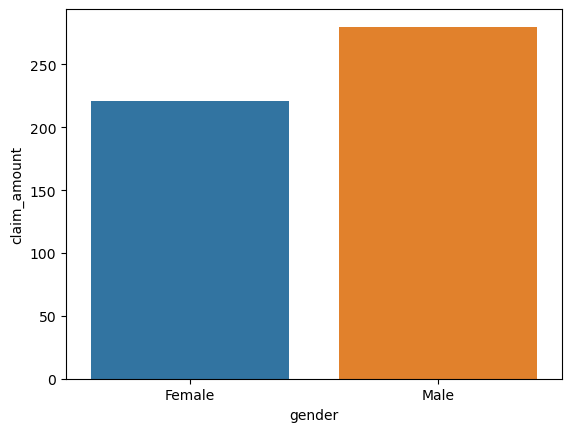

In [19]:
gender_claim_amount = in_claim.loc[(in_claim.incident_cause.isin(['Driver error', 'Other driver error']))].groupby(['gender']).claim_amount.count().reset_index()

sns.barplot(data = gender_claim_amount, x = 'gender', y = 'claim_amount', )
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

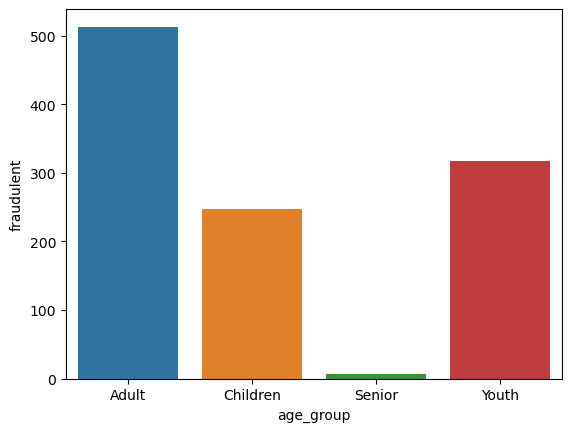

In [20]:
max_fraudulent = in_claim.groupby('age_group').fraudulent.count().reset_index()
max_fraudulent

sns.barplot(data = max_fraudulent, x = "age_group", y = "fraudulent" )
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.


In [21]:
monthly_trend = in_claim.groupby('claim_date').claim_amount.sum().reset_index()

#add columns 'Year' & 'Month'

monthly_trend['Month'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Year'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

monthly_trend_new = monthly_trend.groupby('Month').claim_amount.sum().reset_index().sort_values(by = 'Month')
monthly_trend_new

,Month,claim_amount
0,April,1.276071e+06
1,August,9.112035e+05
2,December,6.967015e+05
3,February,1.133107e+06
4,January,1.332012e+06
5,July,1.379035e+06
6,June,1.276333e+06
7,March,1.320094e+06
8,May,1.114211e+06
9,November,6.011250e+05


<AxesSubplot:xlabel='Month'>

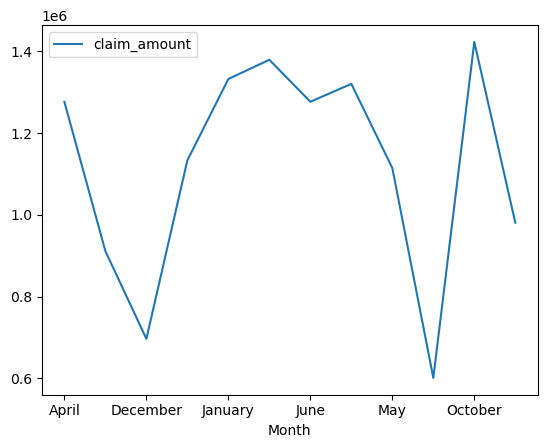

In [22]:
#plot the line chart 'Month' vs 'claim_amount'

monthly_trend_new.plot(kind = 'line', x = 'Month', y = 'claim_amount' )

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 


In [23]:
claim_fraudulent = in_claim.groupby(['gender', 'age_group', 'fraudulent']).claim_amount.mean().reset_index()
claim_fraudulent

,gender,age_group,fraudulent,claim_amount
0,Female,Adult,No,12457.721316
1,Female,Adult,Yes,16040.312341
2,Female,Children,No,12393.308839
3,Female,Children,Yes,6440.328571
4,Female,Senior,No,12470.498519
5,Female,Youth,No,12398.187438
6,Female,Youth,Yes,7756.771259
7,Male,Adult,No,12408.205192
8,Male,Adult,Yes,17121.827484
9,Male,Children,No,11733.178526


In [24]:
fraudulent_claims_male = claim_fraudulent.loc[(claim_fraudulent.fraudulent == 'Yes') & (claim_fraudulent.gender == 'Male')].reset_index(drop = True)
fraudulent_claims_male

,gender,age_group,fraudulent,claim_amount
0,Male,Adult,Yes,17121.827484
1,Male,Children,Yes,16923.860000
2,Male,Youth,Yes,10683.552515


<AxesSubplot:xlabel='age_group'>

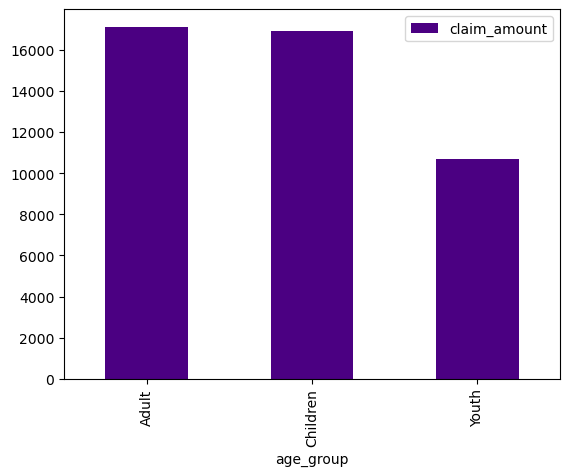

In [25]:
fraudulent_claims_male.plot(kind = 'bar', x = 'age_group', y = 'claim_amount', color = 'indigo')

In [26]:
fraudulent_claims_female = claim_fraudulent.loc[(claim_fraudulent.fraudulent == 'Yes') & (claim_fraudulent.gender == 'Female')].reset_index(drop = True)
fraudulent_claims_female

,gender,age_group,fraudulent,claim_amount
0,Female,Adult,Yes,16040.312341
1,Female,Children,Yes,6440.328571
2,Female,Youth,Yes,7756.771259


<AxesSubplot:xlabel='age_group'>

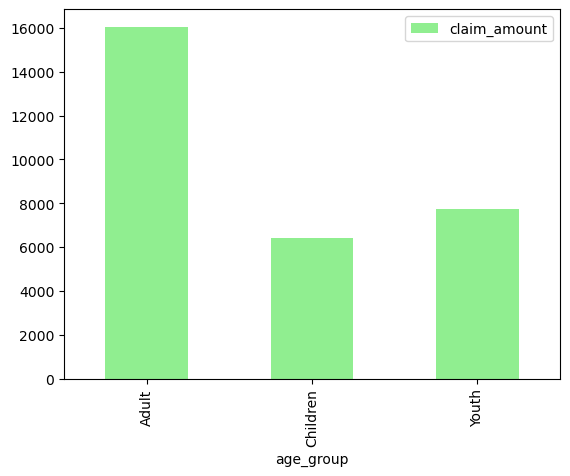

In [27]:
fraudulent_claims_female.plot(kind = 'bar', x = 'age_group', y = 'claim_amount', color = 'lightgreen')

In [28]:
non_fraudulent_claims_male = claim_fraudulent.loc[(claim_fraudulent.fraudulent == 'No') & (claim_fraudulent.gender == 'Male')].reset_index(drop = True)
non_fraudulent_claims_male

,gender,age_group,fraudulent,claim_amount
0,Male,Adult,No,12408.205192
1,Male,Children,No,11733.178526
2,Male,Senior,No,12470.498519
3,Male,Youth,No,12199.075893


<AxesSubplot:xlabel='age_group'>

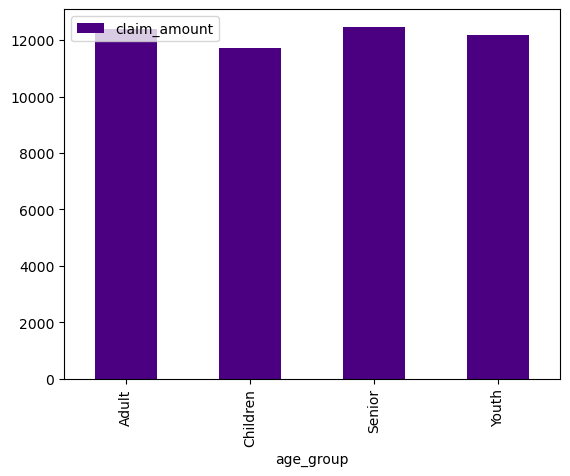

In [29]:
non_fraudulent_claims_male.plot(kind = 'bar', x = 'age_group', y = 'claim_amount', color = 'indigo')

In [30]:
non_fraudulent_claims_female = claim_fraudulent.loc[(claim_fraudulent.fraudulent == 'No') & (claim_fraudulent.gender == 'Female')].reset_index(drop = True)
non_fraudulent_claims_female

,gender,age_group,fraudulent,claim_amount
0,Female,Adult,No,12457.721316
1,Female,Children,No,12393.308839
2,Female,Senior,No,12470.498519
3,Female,Youth,No,12398.187438


<AxesSubplot:xlabel='age_group'>

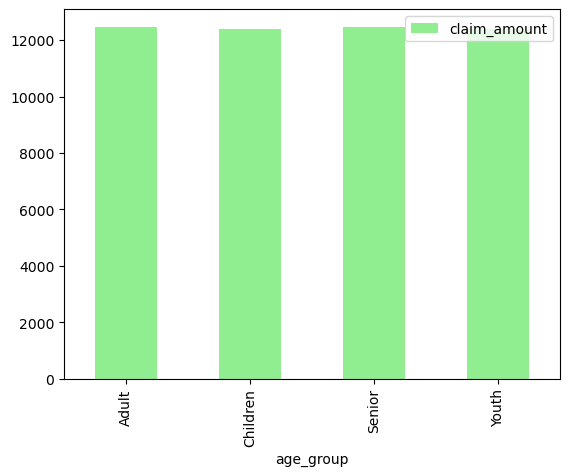

In [31]:
non_fraudulent_claims_female.plot(kind = 'bar', x = 'age_group', y = 'claim_amount', color = 'lightgreen')

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------- Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis       testing steps, conclusion from the p-values and the business implications of the statements. ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### 16. Is there any similarity in the amount claimed by males and females?


In [39]:
#male claim_amount

male_claim_amount = in_claim.loc[(in_claim.gender == 'Male'), 'claim_amount']
male_claim_amount

1       39192.0
2        1621.5
3       37040.0
5        2630.0
6        2920.0
         ...   
1074     2370.0
1079     2260.0
1080    21480.0
1083     2415.0
1084     2310.0
Name: claim_amount, Length: 553, dtype: float64

In [40]:
#female claim_amount

female_claim_amount = in_claim.loc[(in_claim.gender == 'Female'), 'claim_amount']
female_claim_amount

0       12470.498519
4       35250.000000
7       21190.000000
9        2507.000000
10      25010.000000
            ...     
1076    20033.000000
1077     3139.500000
1078     1495.000000
1081    14360.000000
1082     1242.000000
Name: claim_amount, Length: 532, dtype: float64

In [41]:
print('Mean of male_claim_amount = ', male_claim_amount.mean())
print('Mean of female_claim_amount = ', female_claim_amount.mean())

Mean of male_claim_amount =  12821.542393727847
Mean of female_claim_amount =  12105.5976497265


###### Means of claim_amount(male = u1) and claim_amount(female = u2) to be compared.

##### 1. Define Null Hypothesis, H0:
        
           u1 = u2

##### 2. Define Alternate Hypothesis, Ha:

           u1 <> u2  
         
##### 3. Define CI & p-value:
            
          CI = 95%
          pvalue = 0.05
          
##### 4. Perform test:
            
            t-test
            

In [42]:
stats.ttest_ind(male_claim_amount, female_claim_amount)

Ttest_indResult(statistic=0.8848199716864555, pvalue=0.37645013430168395)

##### 5. Rejection Rules:
        
        0.376 > 0.05
        
        We fail to reject the  Null hypothesis.
            
##### 6. Business Conclusion:
            
        Hence we accept Null Hypothesis H0, there is no relationship for the amount claimed by males and females

### 17. Is there any relationship between age category and segment?


###### Relationship between age category and segment

##### 1. Define Null Hypothesis, H0:
        
        2 variables are independent of each other.

##### 2. Define Alternate Hypothesis, Ha:

         2 variables are dependent of each other.
         
##### 3. Define CI & p-value:
            
          CI = 95%
          pvalue = 0.05
          
##### 4. Perform test:
            
            Chi-Square test.

* **Since this test uses Observed frequency table, which is nothing but a Crosstable| Contigency table of 2 categorical variables, we will prepare a Crosstab---> Observed FReq. table.**

In [46]:
obs_freq = pd.crosstab(in_claim.age_group, in_claim.Segment)
obs_freq

Segment,Gold,Platinum,Silver
age_group,,,
Adult,187,161,165
Children,82,84,81
Senior,1,3,3
Youth,102,116,100


In [47]:
stats.chi2_contingency(obs_freq)

(4.113627587049836,
 0.6613026721544895,
 6,
 array([[175.88571429, 172.10322581, 165.01105991],
        [ 84.68571429,  82.86451613,  79.44976959],
        [  2.4       ,   2.3483871 ,   2.2516129 ],
        [109.02857143, 106.68387097, 102.2875576 ]]))

##### 5. Rejection Rules:

           0.66 > 0.05, so we accept H0.

##### 6. Business Conclusion:
           
           Segment & Age_group are independent of each other.
    

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


###### Means of claim_amount(2017-2018) and claim_amount(2016-2017) to be compared.




In [65]:
claim_amt = in_claim.claim_amount
claim_amt

0       12470.498519
1       39192.000000
2        1621.500000
3       37040.000000
4       35250.000000
            ...     
1080    21480.000000
1081    14360.000000
1082     1242.000000
1083     2415.000000
1084     2310.000000
Name: claim_amount, Length: 1085, dtype: float64

In [66]:
print('Mean of claim_amt = ', claim_amt.mean())

Mean of claim_amt =  12470.498519249744


##### 1. Define Null Hypothesis, H0:
        
           u1 < $10,000 

##### 2. Define Alternate Hypothesis, Ha:

           u1 > $10,000 
         
##### 3. Define CI & p-value:
            
          CI = 95%
          pvalue = 0.05
          
##### 4. Perform test:
            
            t-test

In [67]:
stats.ttest_1samp(in_claim.claim_amount, 10000)

Ttest_1sampResult(statistic=6.108222642303586, pvalue=1.4021917187052693e-09)

##### 5. Rejection Rules:

        1.4021917187052693e-09 < 0.05, Hence, reject H0!

##### 6. Business Conclusion:

        Rise in Insurance Claims from last year spend of $10,000


### 19. Is there any difference between age groups and insurance claims?


In [72]:
in_claim.age_group.nunique()

4

In [73]:
in_claim.age_group.value_counts()

Adult       513
Youth       318
Children    247
Senior        7
Name: age_group, dtype: int64

In [75]:
claim = 'claim_amount'

In [76]:
s1 = in_claim.loc[in_claim.age_group == 'Adult', claim]
s2 = in_claim.loc[in_claim.age_group == 'Youth', claim]
s3 = in_claim.loc[in_claim.age_group == 'Children', claim]
s4 = in_claim.loc[in_claim.age_group == 'Senior', claim]

In [82]:
print('Mean of Adult age group = ', s1.mean())
print('Mean of Youth age group = ', s2.mean())
print('Mean of Children age group = ', s3.mean())
print('Mean of Senior age group = ', s4.mean())

Mean of Adult age group =  13356.149030440545
Mean of Youth age group =  11604.179147497623
Mean of Children age group =  11746.412883526302
Mean of Senior age group =  12470.498519249753


##### 1. Define Null Hypothesis, H0:
        
          mean of s1 == mean of s2 == mean of s3 == mean of s4

##### 2. Define Alternate Hypothesis, Ha:

          mean of s1 <> mean of s2 <> mean of s3 <> mean of s4
        
##### 3. Define CI & p-value:
            
          CI = 95%
          pvalue = 0.05
          
##### 4. Perform test:
            
          F-test| ANOVA

In [83]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=1.4489361309995707, pvalue=0.22700444078512175)

##### 5. Rejection Rules:
        
        0.227 > 0.05, Hence we accept H0.
        
##### 6. Business Conclusion:
            
        There is no difference between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [84]:
in_claim.total_policy_claims.nunique()

8

In [85]:
in_claim.total_policy_claims.value_counts()

1.0    781
2.0    104
3.0     86
4.0     58
5.0     27
6.0      9
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [86]:
policy_claim = 'claim_amount'

In [92]:
t1 = in_claim.loc[in_claim.total_policy_claims == 1.0, policy_claim]
t2 = in_claim.loc[in_claim.total_policy_claims == 2.0, policy_claim]
t3 = in_claim.loc[in_claim.total_policy_claims == 3.0, policy_claim]
t4 = in_claim.loc[in_claim.total_policy_claims == 4.0, policy_claim]
t5 = in_claim.loc[in_claim.total_policy_claims == 5.0, policy_claim]
t6 = in_claim.loc[in_claim.total_policy_claims == 6.0, policy_claim]
t7 = in_claim.loc[in_claim.total_policy_claims == 7.0, policy_claim]
t8 = in_claim.loc[in_claim.total_policy_claims == 8.0, policy_claim]

In [93]:
print('Mean of t1 = ', t1.mean())
print('Mean of t2 = ', t2.mean())
print('Mean of t3 = ', t3.mean())
print('Mean of t4 = ', t4.mean())
print('Mean of t5 = ', t1.mean())
print('Mean of t6 = ', t2.mean())
print('Mean of t7 = ', t3.mean())
print('Mean of t8 = ', t4.mean())

Mean of t1 =  12403.65035524103
Mean of t2 =  13876.45186612499
Mean of t3 =  12928.191757156957
Mean of t4 =  11049.72408687068
Mean of t5 =  12403.65035524103
Mean of t6 =  13876.45186612499
Mean of t7 =  12928.191757156957
Mean of t8 =  11049.72408687068


##### 1. Define Null Hypothesis, H0:
        
          mean of s1 == mean of s2 == mean of s3 == mean of s4 == mean of s5 == mean of s6 == mean of s7 == mean of s8

##### 2. Define Alternate Hypothesis, Ha:

          mean of s1 <> mean of s2 <> mean of s3 <> mean of s4 <> mean of s5 <> mean of s6 <> mean of s7 <> mean of s8
        
##### 3. Define CI & p-value:
            
          CI = 95%
          pvalue = 0.05
          
##### 4. Perform test:
            
          F-test| ANOVA

In [94]:
stats.f_oneway(t1, t2, t3, t4, t5, t6, t7, t8)

F_onewayResult(statistic=0.9303871958342093, pvalue=0.48182615228564063)

##### 5. Rejection Rules:
        
        0.48 > 0.05, Hence we accept H0.
        
##### 6. Business Conclusion:
            
        There is relationship between total number of policy claims and the claimed amount